# Run VGG16 classification model

This notebook is a test notebook to see how good does this model works. 

In [1]:
import vgg16
from vgg16 import read_data, train_model, evaluate_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = vgg16.create_model()

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 256)       2

## Train

In [4]:
# parameter is the correct path to the pickle file.
train_frame = read_data("../../test_data_lead/ferPlus_data_pickle/train_expand.pkl")

In [5]:
history = train_model(model = model, frame = train_frame, batch_size = 64, epochs = 10, vs = 0.2)

Epoch 1/10
353/353 [==============================] - 88s 207ms/step - loss: 6.6586 - accuracy: 0.3329 - val_loss: 1.6489 - val_accuracy: 0.3284
Epoch 2/10
353/353 [==============================] - 64s 183ms/step - loss: 1.6001 - accuracy: 0.3508 - val_loss: 1.6358 - val_accuracy: 0.3284
Epoch 3/10
353/353 [==============================] - 63s 179ms/step - loss: 1.5984 - accuracy: 0.3525 - val_loss: 1.6342 - val_accuracy: 0.3284
Epoch 4/10
353/353 [==============================] - 66s 186ms/step - loss: 1.6082 - accuracy: 0.3533 - val_loss: 1.6331 - val_accuracy: 0.3284
Epoch 5/10
353/353 [==============================] - 66s 186ms/step - loss: 1.5999 - accuracy: 0.3602 - val_loss: 1.6335 - val_accuracy: 0.3284
Epoch 6/10
353/353 [==============================] - 67s 189ms/step - loss: 1.6056 - accuracy: 0.3518 - val_loss: 1.6420 - val_accuracy: 0.3284
Epoch 7/10
353/353 [==============================] - 64s 180ms/step - loss: 1.5975 - accuracy: 0.3532 - val_loss: 1.6333 - val_ac

## Test  

In [6]:
# parameter is the correct path to the pickle file.
test_frame = read_data("../../test_data_lead/ferPlus_data_pickle/test_expand.pkl")

In [7]:
loss, accuracy = evaluate_model(model, test_frame, 256)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

28/28 [==============================] - 18s 379ms/step - loss: 1.6121 - accuracy: 0.3554
Test loss: 1.6121
Test accuracy: 0.3554


## Results

In [8]:
def plot_acc_loss(history):
    """Plot the results of the fit function of the model.
       Args:
           history: A nummpy array as input.
    """
    # Plot accuracy graph
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.ylim([0, 1.0])
    plt.legend(loc='upper left')
    plt.show()

    # Plot loss graph
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # plt.ylim([0, 3.5])
    plt.legend(loc='upper right')
    plt.show()

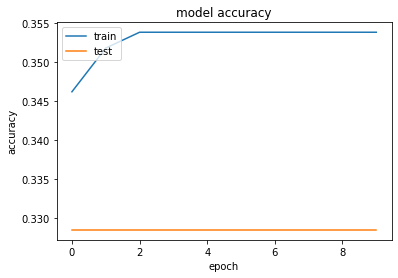

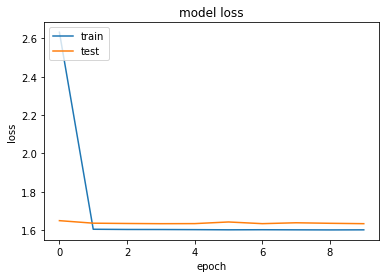

In [9]:
plot_acc_loss(history)